In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

C:\Users\gauta\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\gauta\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\gauta\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framewo

In [2]:
# ✅ Load dataset (resize smaller for speed)
IMG_SIZE = (64, 64)
BATCH_SIZE = 32

In [3]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    "Dataset/train",
    labels="inferred",
    label_mode="categorical",
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    shuffle=True
)

Found 70295 files belonging to 38 classes.


In [4]:
#Validate ImageProcessing
val_ds = tf.keras.utils.image_dataset_from_directory(
    "Dataset/valid",
    labels="inferred",
    label_mode="categorical",
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    shuffle=True
)

Found 17572 files belonging to 38 classes.


In [6]:
# ✅ Save class names BEFORE prefetch/cache
class_names = train_ds.class_names
print("Classes:", class_names)

Classes: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___

In [7]:
# ✅ Optimize pipeline
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [8]:
# ✅ Use Transfer Learning (fast + accurate)
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(64, 64, 3),
    include_top=False,
    weights="imagenet"
)
base_model.trainable = False  # freeze backbone

C:\Users\gauta\AppData\Local\Temp\ipykernel_8052\517809657.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(


In [10]:
# ✅ Build Model
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(64, 64, 3),
    include_top=False,
    weights="imagenet"
)
base_model.trainable = False

model = keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(len(class_names), activation="softmax")  # ✅ Now works
])

C:\Users\gauta\AppData\Local\Temp\ipykernel_8052\883782068.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(


In [11]:
# ✅ Compile
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [12]:
# ✅ Early stopping (save time)
early_stop = EarlyStopping(monitor="val_loss", patience=2, restore_best_weights=True)

In [13]:
# ✅ Train
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[early_stop]
)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 410s 149ms/step - accuracy: 0.2003 - loss: 3.0446 - val_accuracy: 0.3914 - val_loss: 2.1896
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 221s 101ms/step - accuracy: 0.3510 - loss: 2.2877 - val_accuracy: 0.4623 - val_loss: 1.9254
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 187s 85ms/step - accuracy: 0.4112 - loss: 2.0501 - val_accuracy: 0.4918 - val_loss: 1.8005
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 183s 83ms/step - accuracy: 0.4448 - loss: 1.9208 - val_accuracy: 0.5112 - val_loss: 1.7227
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 197s 90ms/step - accuracy: 0.4641 - loss: 1.8450 - val_accuracy: 0.5263 - val_loss: 1.6679
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 190s 86ms/step - accuracy: 0.4805 - loss: 1.7914 - val_accuracy: 0.5380 - val_loss: 1.6325
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 184s 84ms/step - accuracy: 0.4905 - loss: 1.7528 - val_accuracy: 0.5451 - val_loss: 1.6011
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 184s 84ms/step - accuracy

In [14]:
# ✅ Evaluate
loss, acc = model.evaluate(val_ds)
print(f"Validation Accuracy: {acc:.2f}")

550/550 ━━━━━━━━━━━━━━━━━━━━ 39s 70ms/step - accuracy: 0.5580 - loss: 1.5463
Validation Accuracy: 0.56


In [15]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [16]:
for x,y in train_ds:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[132.   122.   121.  ]
   [131.75 121.75 120.75]
   [132.   122.   121.  ]
   ...
   [124.25 113.25 109.25]
   [123.75 112.75 108.75]
   [127.   116.   112.  ]]

  [[127.5  117.5  116.5 ]
   [130.5  120.5  119.5 ]
   [132.   122.   121.  ]
   ...
   [123.5  112.5  108.5 ]
   [124.25 113.25 109.25]
   [126.5  115.5  111.5 ]]

  [[130.5  120.5  119.5 ]
   [132.25 122.25 121.25]
   [133.   123.   122.  ]
   ...
   [120.25 109.25 105.25]
   [126.25 115.25 111.25]
   [128.   117.   113.  ]]

  ...

  [[142.5  131.5  137.5 ]
   [142.5  131.5  137.5 ]
   [142.75 131.75 137.75]
   ...
   [137.75 126.75 130.75]
   [134.5  123.5  127.5 ]
   [130.25 119.25 123.25]]

  [[144.   133.   139.  ]
   [144.   133.   139.  ]
   [143.   132.   138.  ]
   ...
   [138.   127.   131.  ]
   [133.75 122.75 126.75]
   [138.75 127.75 131.75]]

  [[144.   133.   139.  ]
   [144.   133.   139.  ]
   [144.   133.   139.  ]
   ...
   [136.5  125.5  129.5 ]
   [136.25 125.25 129.25]
   [139.5  128.5  13

In [17]:
#Model Evaluation on Training set
train_loss,train_acc = model.evaluate(train_ds)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 141s 64ms/step - accuracy: 0.5774 - loss: 1.4832


In [18]:
print(train_loss,train_acc)

1.483234167098999 0.577366828918457


In [19]:
#Model on Validation set
val_loss,val_acc = model.evaluate(val_ds)

550/550 ━━━━━━━━━━━━━━━━━━━━ 34s 61ms/step - accuracy: 0.5580 - loss: 1.5463


In [20]:
print(val_loss, val_acc)

1.5462852716445923 0.5579899549484253


In [21]:
### Saving Model

In [22]:
model.save("trained_model.keras")

In [24]:
history.history

{'accuracy': [0.20034141838550568,
  0.35099223256111145,
  0.4111814498901367,
  0.44478270411491394,
  0.4641297459602356,
  0.48053205013275146,
  0.49050429463386536,
  0.49993598461151123,
  0.5065509676933289,
  0.5097517371177673],
 'loss': [3.0446362495422363,
  2.2877211570739746,
  2.0500993728637695,
  1.920830488204956,
  1.8449585437774658,
  1.7913811206817627,
  1.752807378768921,
  1.7193735837936401,
  1.695098638534546,
  1.6816186904907227],
 'val_accuracy': [0.3914181590080261,
  0.46226951479911804,
  0.49180513620376587,
  0.5112110376358032,
  0.5263487100601196,
  0.5380150079727173,
  0.545128583908081,
  0.5494536757469177,
  0.5531527400016785,
  0.5579899549484253],
 'val_loss': [2.189624547958374,
  1.9253637790679932,
  1.8005427122116089,
  1.722720742225647,
  1.6679497957229614,
  1.6325021982192993,
  1.6011178493499756,
  1.5784817934036255,
  1.5632058382034302,
  1.5462852716445923]}

In [26]:
#Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(history.history,f)

In [27]:
history.history['val_accuracy']

[0.3914181590080261,
 0.46226951479911804,
 0.49180513620376587,
 0.5112110376358032,
 0.5263487100601196,
 0.5380150079727173,
 0.545128583908081,
 0.5494536757469177,
 0.5531527400016785,
 0.5579899549484253]

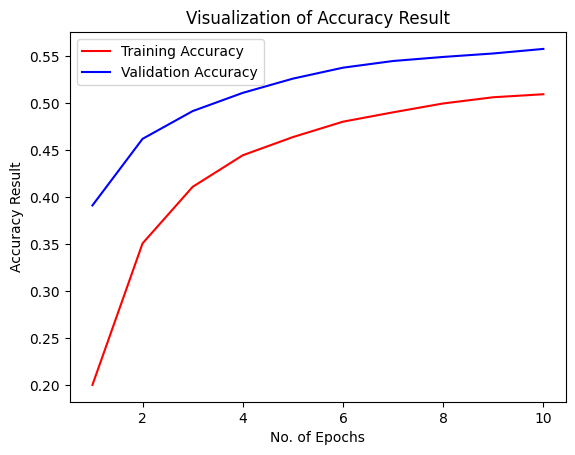

In [29]:
import matplotlib.pyplot as plt
epochs = [i for i in range(1,11)]
plt.plot(epochs,history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

In [34]:
#Some Others Metrics for Model Evaluation
y_pred = model.predict(val_ds)
print("Class Names:", class_names)

550/550 ━━━━━━━━━━━━━━━━━━━━ 32s 56ms/step
Class Names: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Sp

In [35]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'Dataset/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [36]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 123s 222ms/step


(array([[6.0671248e-04, 9.8962410e-06, 5.3741958e-04, ..., 2.5626202e-06,
         4.7006088e-06, 7.5518503e-05],
        [3.4395338e-04, 3.3364249e-06, 2.7400357e-04, ..., 5.8119181e-06,
         1.7846438e-06, 1.1643263e-03],
        [4.8257821e-06, 5.1933062e-06, 2.9258201e-05, ..., 1.3159691e-10,
         8.1696907e-09, 8.2463083e-07],
        ...,
        [4.1694852e-04, 2.0213196e-05, 6.1112078e-04, ..., 8.9557776e-05,
         8.0806538e-05, 6.8655133e-04],
        [1.5318644e-04, 6.6126194e-07, 9.1002340e-04, ..., 5.3772674e-05,
         6.5154695e-06, 9.2553132e-04],
        [5.1402557e-04, 2.0663033e-04, 3.3404701e-04, ..., 1.8093422e-05,
         7.1708988e-03, 1.0333053e-03]], dtype=float32),
 (17572, 38))

In [37]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [38]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([8, 8, 8, ..., 8, 8, 8])>

In [39]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [40]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [43]:
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
# ✅ True labels
Y_true = np.concatenate([y for x, y in val_ds], axis=0)
Y_true = np.argmax(Y_true, axis=1)

# ✅ Predictions
y_pred = model.predict(val_ds)
predicted_categories = np.argmax(y_pred, axis=1)

# ✅ Use correct variable: class_names
print("Class Names:", class_names)
print(classification_report(Y_true, predicted_categories, target_names=class_names))

550/550 ━━━━━━━━━━━━━━━━━━━━ 32s 57ms/step
Class Names: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Sp

In [44]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[182,  37,  13, ...,   5,   1,  23],
       [ 15, 255,   2, ...,   1,   4,   7],
       [  4,   2, 271, ...,  15,   2,   0],
       ...,
       [  6,   3,   3, ..., 193,   5,   1],
       [ 15,   8,   7, ...,   3, 255,   3],
       [ 27,   4,   2, ...,   1,   4, 254]])

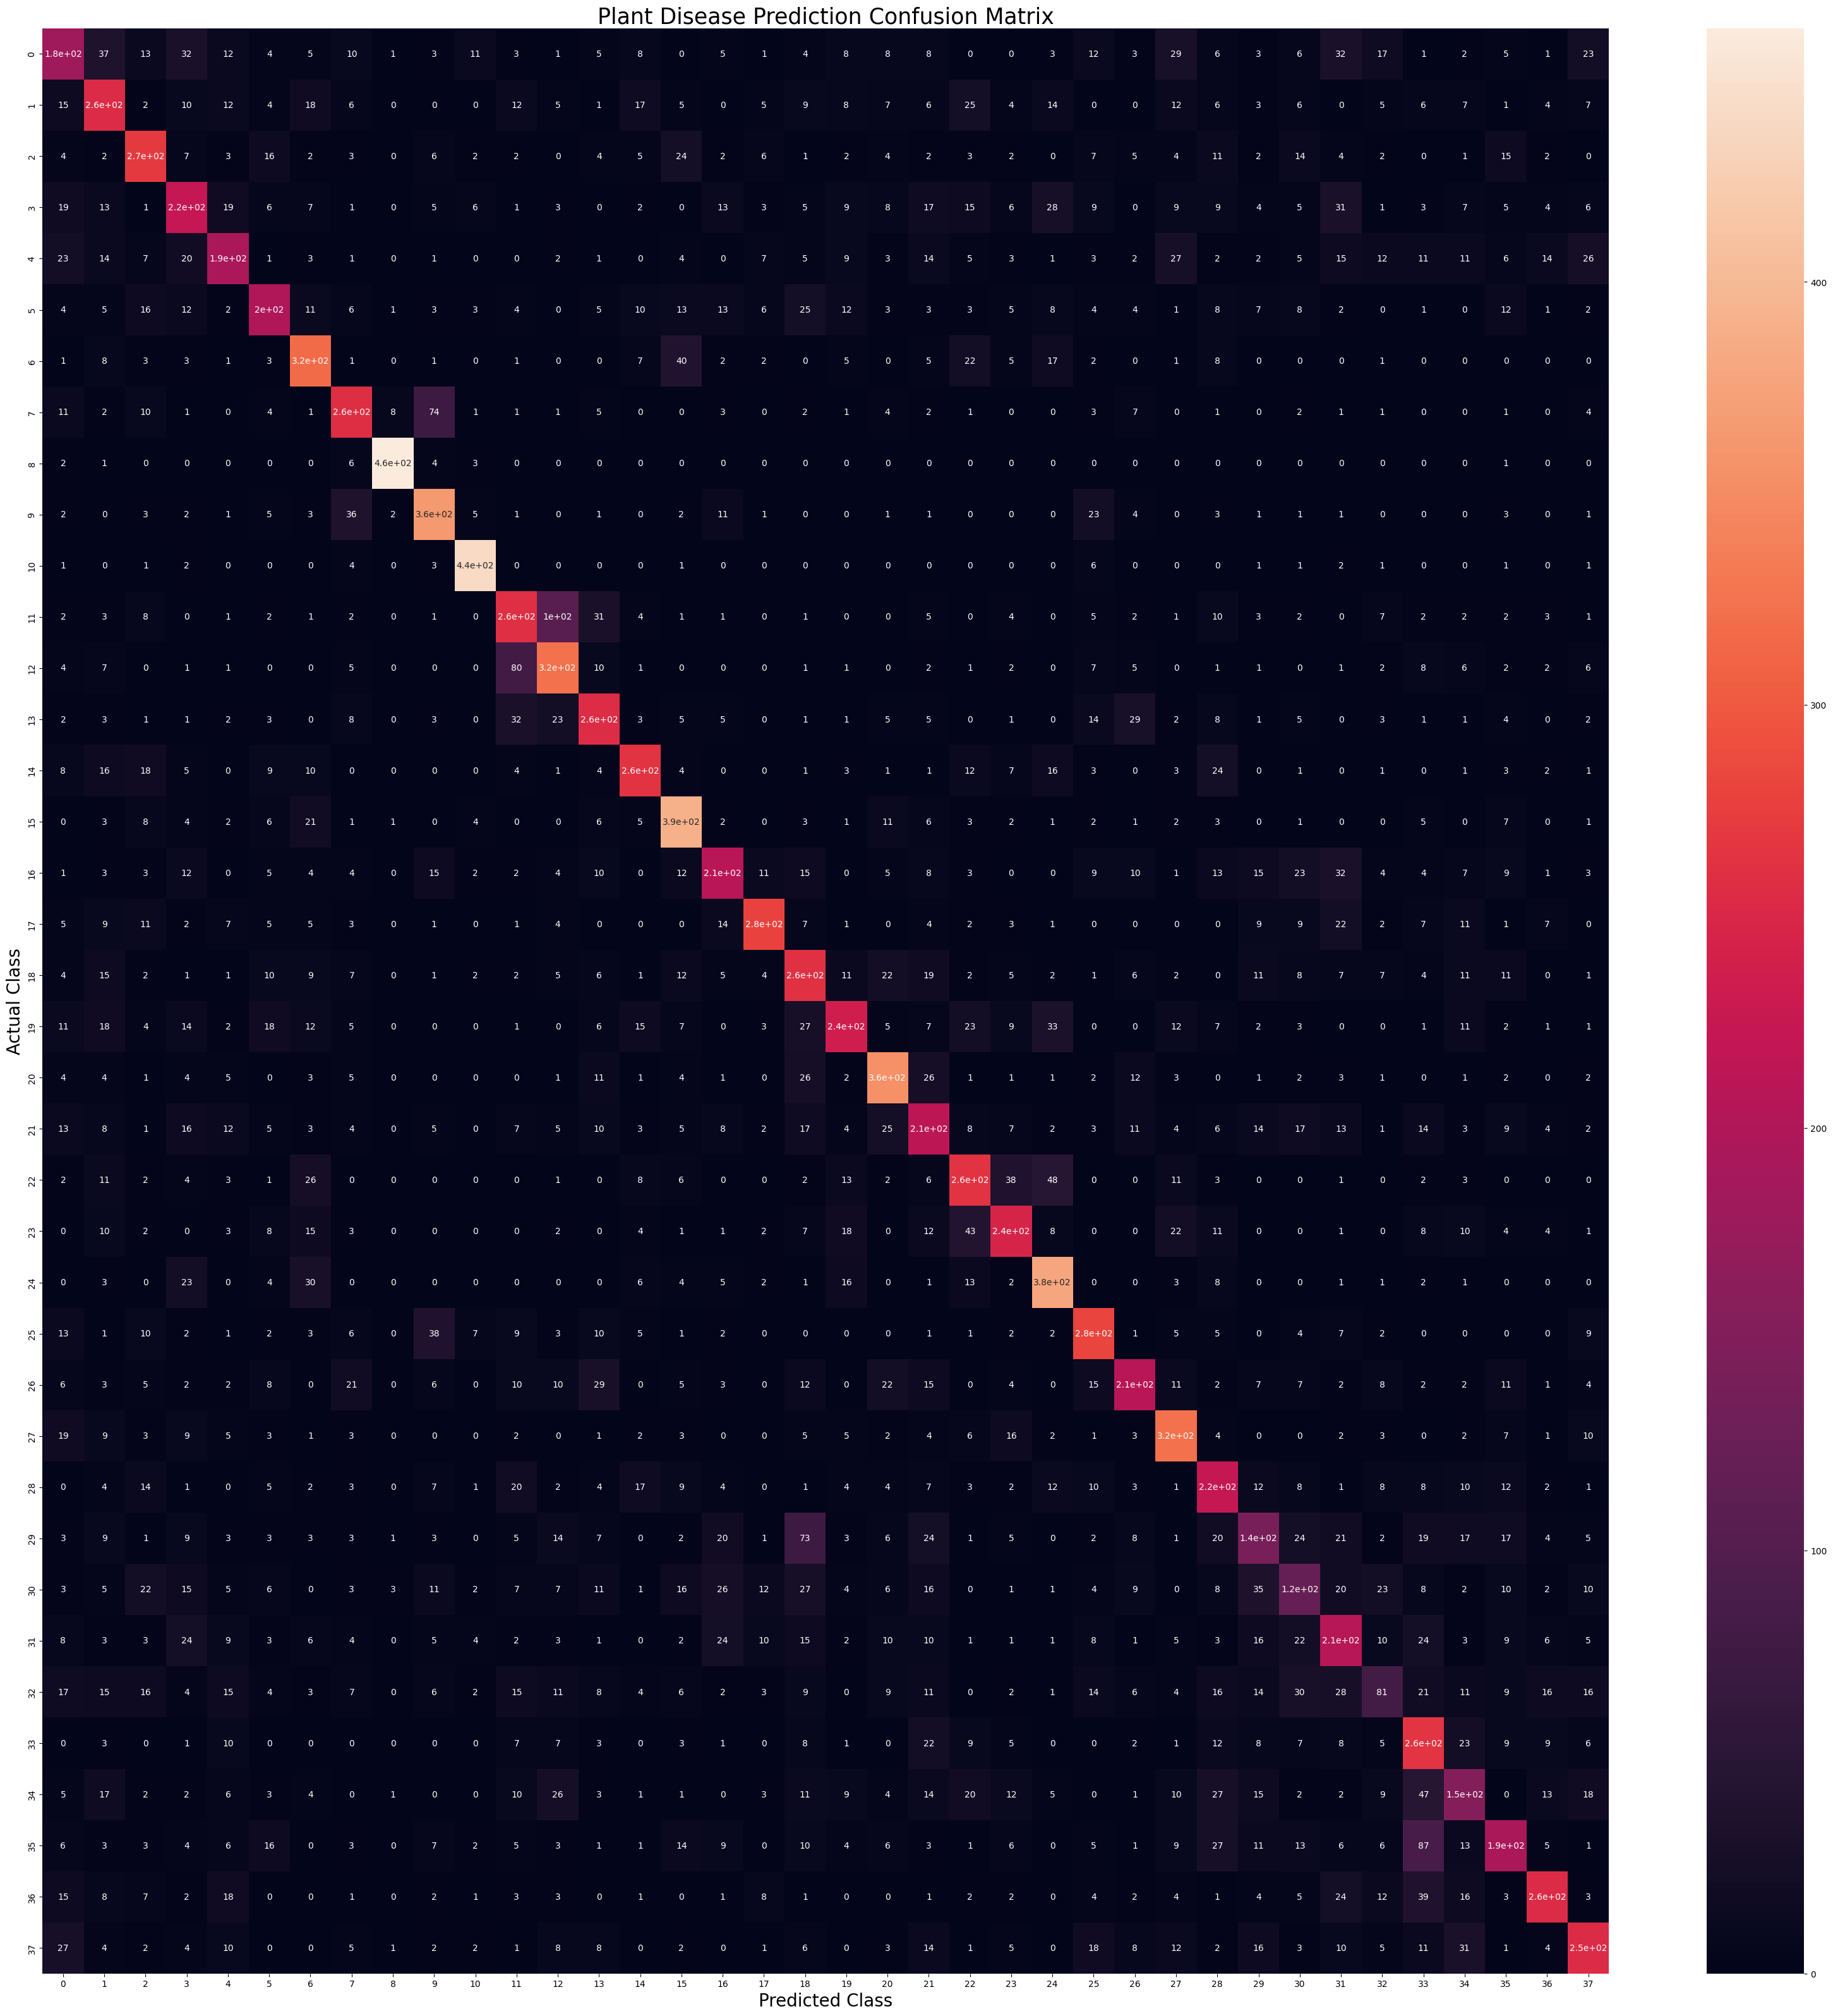

In [46]:
#Confussion Matrix Visualization
import seaborn as sns
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()